# Projet CNN

In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import Precision, Recall

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2023-05-03 10:13:05.974073: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 10:13:06.138456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-03 10:13:06.138494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-03 10:13:06.174143: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-03 10:13:07.246419: W tensorflow/stream_executor/platform/de

In [2]:
train = pd.read_csv('data/train_cnn.csv')

In [3]:
train.shape

(42000, 785)

In [4]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

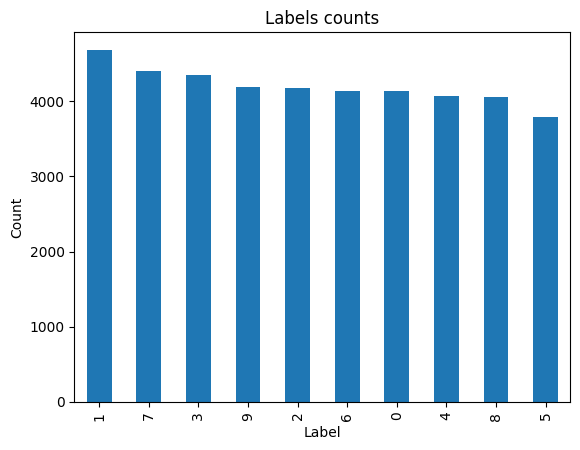

In [5]:
train.label.value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [6]:
X = np.array(train.drop(['label'],axis=1))
y = train[['label']]

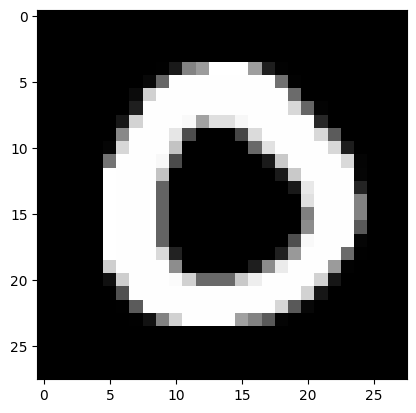

In [7]:
obs  = np.array(X)
img= obs[4]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
print(X.shape)

(42000, 784)


In [9]:
# split training and validation data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# reshape and normalize test data
X_train = ((X_train).reshape((-1,28,28,1)))/255.0
X_test = ((X_test).reshape((-1 ,28,28,1)))/255.0


print('trianing set: ', X_train.shape, y_train.shape)
print('validation set: ', X_test.shape, y_test.shape)
print('test set: ', X_test.shape, y_test.shape)

trianing set:  (33600, 28, 28, 1) (33600, 1)
validation set:  (8400, 28, 28, 1) (8400, 1)
test set:  (8400, 28, 28, 1) (8400, 1)


In [10]:
model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(8, (3, 3), activation='relu',input_shape=(28, 28, 1)), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),

        tf.keras.layers.Dense(len(train.label.unique()), activation=tf.nn.softmax) # generalized logistic regression
    ])


2023-05-03 10:13:14.256859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-03 10:13:14.256951: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-03 10:13:14.256974: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UTILISA-U9ST353): /proc/driver/nvidia/version does not exist
2023-05-03 10:13:14.257269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
METRICS = metrics=['accuracy',Precision(name='precision'),Recall(name='recall')]
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [13]:
# train neural network and have it automatically stop on 95% accuracy
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=32, verbose=1)

Epoch 1/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.2655 - accuracy: 0.9184 - val_loss: 0.1443 - val_accuracy: 0.9545
Epoch 2/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0903 - accuracy: 0.9720 - val_loss: 0.0834 - val_accuracy: 0.9754
Epoch 3/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0680 - val_accuracy: 0.9773
Epoch 4/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0501 - val_accuracy: 0.9852
Epoch 5/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0480 - val_accuracy: 0.9856
Epoch 6/10
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0351 - accuracy: 0.9885 - val_loss: 0.0618 - val_accuracy: 0.9801
Epoch 7/10
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0547 -

"plt.plot(history.history['val_accuracy'])\nplt.title('CNN Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Number of Epochs')\nplt.legend(['training', 'validation'], loc='lower right')\nplt.show()"

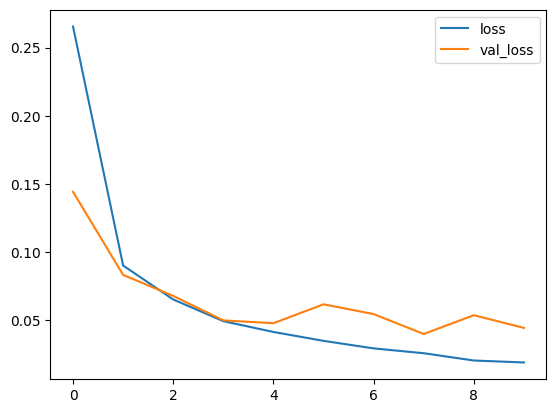

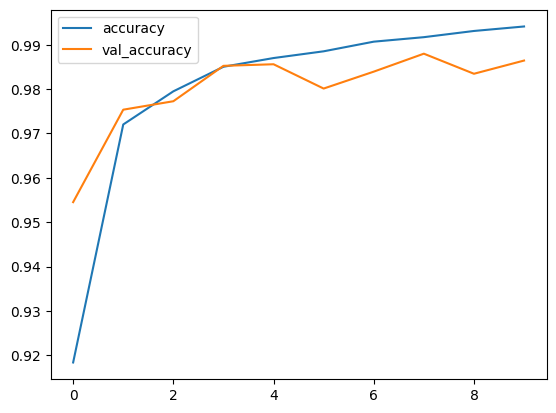

In [14]:
# Plot training vs validation accruacy
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
'''plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()'''

263/263 [==============================] - 1s 5ms/step


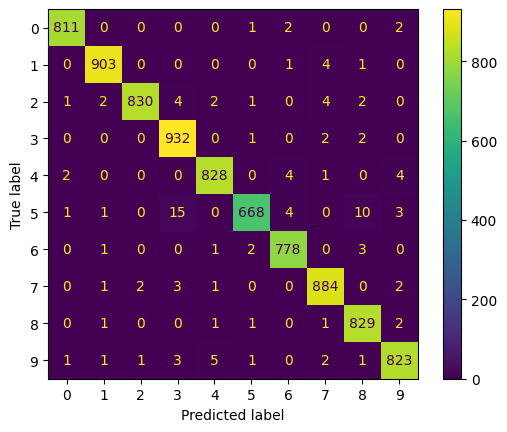

In [15]:
test_predictions = model.predict(X_test)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = y_test

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()


In [16]:
test_true_labels.value_counts()

label
3        937
1        909
7        893
2        846
4        839
9        838
8        835
0        816
6        785
5        702
dtype: int64

In [17]:
# import pickle

# with open('../model.pickle', 'wb') as f:
#     pickle.dump(model, f)
#     f.close()

In [18]:
model.save('CNN_Model.h5')

In [20]:
test = np.array(pd.read_csv('data/test_cnn.csv'))
test1 = ((test[8]).reshape((-1,28,28,1)))/255.0

In [21]:
test8 = ((test[8]).reshape((-1,28,28,1)))/255.0

In [22]:
test7 = ((test[7]).reshape((-1,28,28,1)))/255.0

In [23]:
test1.shape

(1, 28, 28, 1)

In [24]:
predictions = model.predict(test7)
predictions

1/1 [==============================] - 0s 27ms/step


array([[9.5722219e-15, 5.9478183e-10, 4.7459530e-09, 1.0000000e+00,
        8.3127197e-14, 1.9648512e-12, 1.0772333e-19, 2.1123319e-09,
        9.2075670e-12, 6.5791247e-11]], dtype=float32)

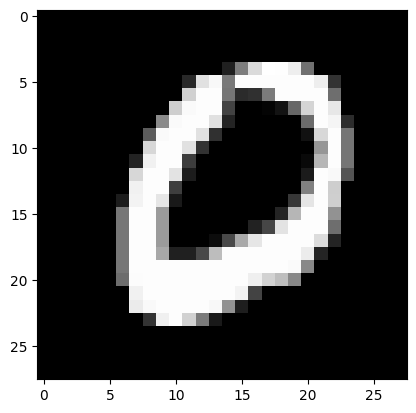

In [32]:
img_test= test[210]
img_test2 = img_test.reshape((28,28))
plt.imshow(img_test2 , cmap='gray')
plt.show()


In [28]:
img_test.shape

(784,)